<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 3</center></b><h2>
<h3><b><center>Modelando el interior solar</center></b><h3>
<h5><center><b>Asignada</b>: 19 de Septiembre de 2023</center><h5>
<h5><center><b>Entrega</b>: 3 de Octubre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Manuela Góez Estepa
<br/>
<b>Última actualización</b>: 1 Octubre
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea estudiar el interior de estrellas reales usando para ello modelos politrópicos de cuerpos autogravitantes.

Para ello nos apoyaremos, como fuente de información y para validar nuestros modelos, de los resultados de simulaciones realistas del interior estelar disponibles en el sitio web http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web.

**Procedimiento**:

Para conseguir el objetivo:

1. Descargar los datos de evolución y estructura interior de una estrella con la masa, metalicidad (Z=0.02) del Sol usando el formulario http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web#Submit_a_Calculation.

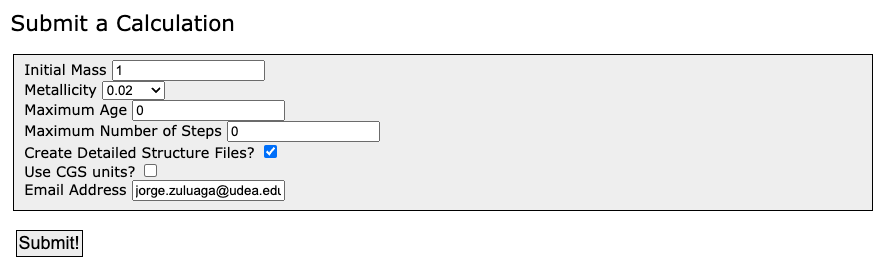

2. Los datos provistos en un archivo comprimido son:

   - *summary.txt*: contienen datos sobre la evolución de la estrella. Las columnas del archivos se describen en http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web. En particular nos interesa la primera columna *i* que indica el archivo con la estructura detallada en cada tiempo de simulación. En la segunda columna *t* esta la edad de la estrella. Para cada edad nos dan las propiedades de la estrella, masa, luminosidad, radio, densidad central, presión central, etc.

   - *structure_NNNNN.txt*: archivos con datos de las propiedades interiores de la estrella. Las columnas del archivo se describen en http://user.astro.wisc.edu/~townsend/static.php?ref=ez-web. En particular nos interesan las columnas de radio (columna 2), temperatura (columna 6), densidad (columna 5), presión (columna 4), índice adiabático (columna 10).

   Hacer gráficos de las siguientes propiedades de la estrella como función del tiempo:

   - Temperatura central.
   - Fracción de Helio en el centro.
   - Radio de la estrella.

   Estos gráficos nos dan una idea de las distintas etapas por las que pasa la estrella.

3. Vamos a estudiar la estructura del Sol en 4 momentos de su vida. Para cada uno de estos momentos recuperar los datos de la estructura provistos por el modelo.

   - **Inicio**. En la fase de secuencia principal de edad 0. Este es el primer momento de la estrella.
   - **Tiempo presente**. En la fase actual, correspondiente a 4560 millones de años.
   - **Fin de la secuencia principal**. En la fase de final de la fusión del Hidrógeno en el centro, que corresponde a un tiempo cuando la fracción de Helio en el centro alcanza un valor $Y_c \approx 1$.
   - **Fusión del Helio (gigante roja)**. En la fase de fusión del Helio, cuando la temperatura del centro es 75 millones de grados.

4. Para cada etapa vamos a usar la solución a la ecuación de Lane-Emden para encontrar la temperatura, densidad y presión interior de la estrella y vamos a comparar la calidad de nuestro modelo con el modelo exacto.

   - Recuperar el valor del índice adiabático $\gamma$ y el calor específico $C_P$ del modelo realista para la estrella.

   - Usando las propiedades superficiales (masa, radio) calcular la temperatura y densidad central predicha por la ecuación de Lane-Emden (como lo hicimos en el ejemplo de clase).

   - Calcular la temperatura densidad y presión del interior de la estrella usando la solución de la ecuación de Lane-Emden en cada fase y comparar con el modelo realista de la estrella.

5. ¿Cómo podría mejorarse el ajuste entre las propiedades calculadas con el modelo politrópico y el model realista? Intentelo al menos con el interior del Sol en una de las etapas estudiadas.
   

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - 3 Gráficos de temperatura central, fracción de Helio en el centro, radio como función del tiempo para la estrella.
  - Gráficos de temperatura, densidad y presión del interior de la estrella en cada fase, calculados con la ecuación de Lane-Emden, comparadas con las mismas propiedades obtenidas con el modelo realista. En total son 12 gráficos (4 etapas, 3 propiedades).
  - Gráficos de temperatura, densidad y presión mejorados (punto 5).

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

# 1. Descarga de datos

In [ ]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from scipy.integrate import solve_ivp,quad
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

Solo se van a descargar 5 archivos de datos y uno de Summary.

In [ ]:
!gdown -q https://drive.google.com/file/d/1A5BUOJeq4-AwCtanUoHNKMYTr-r8pZ5W/view?usp=drive_link --fuzzy
!gdown -q https://drive.google.com/file/d/1mBVTDEnuVknZNoHALk3iqq1WqCybUrpb/view?usp=sharing --fuzzy
!gdown -q https://drive.google.com/file/d/1T2uAyeuA10-GI2b_JGrqSQ9f6_I6dv-C/view?usp=sharing --fuzzy
!gdown -q https://drive.google.com/file/d/1cWvlqpPngdN-OVYv-gd2ovWGHBeGmHxb/view?usp=sharing --fuzzy
!gdown -q https://drive.google.com/file/d/1J2xB_A32rup6X4pnJK4ouc9CM2zLYO2z/view?usp=sharing --fuzzy

In [ ]:
#Se muestra el summary completo
summary = pd.read_csv("summary.txt", sep = "\s+", header = None,
                      index_col = 0)

summary

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,,,,,,,,,,,,,,,,,,,,,
0,0.000000e+00,1.000000,-0.154656,-0.052737,3.749394,7.126281,4.893762,16.150422,-1.724627,0.698288,...,0.052255,2.635337e-34,0.000000e+00,1.622945e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.000000e+04,1.000000,-0.149121,-0.047791,3.748305,7.127136,4.893501,16.151001,-1.728404,0.698284,...,0.054086,2.864470e-34,0.000000e+00,1.675944e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000e+05,1.000000,-0.149131,-0.047801,3.748307,7.127134,4.893502,16.150999,-1.728400,0.698280,...,0.054018,2.858303e-34,0.000000e+00,1.676856e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.600000e+05,1.000000,-0.149117,-0.047798,3.748309,7.127135,4.893507,16.151003,-1.728391,0.698274,...,0.053941,2.851385e-34,0.000000e+00,1.676853e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.320000e+05,1.000000,-0.149109,-0.047796,3.748310,7.127134,4.893516,16.151008,-1.728374,0.698268,...,0.053848,2.842977e-34,0.000000e+00,1.676847e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,1.230248e+10,0.632543,3.789111,2.218768,3.599583,7.921574,9.473536,22.143561,37.283399,0.000000,...,4265.905780,8.449900e+04,2.825356e-17,2.881403e+01,0.628373,0.615394,0.456624,0.030794,0.015070,0.008577
917,1.230248e+10,0.632543,3.789035,2.218703,3.599597,7.921544,9.473481,22.143477,37.283352,0.000000,...,4194.420660,9.183143e+04,2.802590e-17,2.879299e+01,0.628373,0.615279,0.456627,0.030840,0.015043,0.008578
918,1.230248e+10,0.632543,3.788960,2.218637,3.599611,7.921509,9.473417,22.143380,37.283295,0.000000,...,4112.700410,1.034541e+05,2.776550e-17,2.876809e+01,0.628373,0.615150,0.456629,0.030893,0.015014,0.008578


Del archivo *summary.txt* se extrae la información asociada a la primera columna, que indica el número del archivo para la información detallada y la segunda columna que es la edad de la estrella.

De cada archivo de estructura se tiene interés en radio, temperatura, densidad, presión e índice adiabático, por lo tanto, hay que extraer la información de summary para los archivos.

En este caso se escogieron arbitrariamente los archivos 000,065,135,454

In [ ]:
id_file = ["000","065","135","454"]

#Para crear dinamicamente el nombre de las variables en la siguiente linea
estructuras = {}

In [ ]:
for id in id_file:

  #creo el nombre de la variable que contiene el archivo
  name = "file_"+id

  #así no se tienen que leer los archivos individualmente
  #en estos dataframe, las columnas inician en 0, por lo que
  #se debe tomar en número anterior
  estructuras[name] = pd.read_csv("structure_00"+id+".txt", sep = "\s+",
                                  header = None, usecols = [1,5,4,3,8,9])

In [ ]:
#Se pueden ver cúantos archivos se tiene
estructuras.keys()

dict_keys(['file_000', 'file_065', 'file_135', 'file_454'])

**Columas**

*1. Radius coordinate $(R_\odot)$ \\
*3. Total pressure $(N \ m^{-2})$ \\
*4. Density $(kg \  m^{-3})$ \\
*5. Temperature $(K)$ \\
*8. Specific heat at constant pressure $(J \ K^{-1} \ kg^{-1})$ \\
*9. First adiabatic exponent \\

In [ ]:
estructuras['file_000']

,1,3,4,5,8,9
0,0.885652,2.027852e+03,0.000056,5.615572e+03,16223.7326,1.662990
1,0.885601,2.832245e+03,0.000074,5.943909e+03,16228.3749,1.662392
2,0.885564,3.595652e+03,0.000087,6.390799e+03,16363.9022,1.654646
3,0.885537,4.433739e+03,0.000099,6.958950e+03,17360.7414,1.605939
4,0.885512,6.322675e+03,0.000128,7.622338e+03,21505.5608,1.472398
...,...,...,...,...,...,...
194,0.014156,1.406964e+16,78068.849400,1.334847e+07,33189.2788,1.665363
195,0.012499,1.408795e+16,78129.839200,1.335536e+07,33189.3348,1.665360
196,0.010675,1.410553e+16,78188.384000,1.336198e+07,33189.3887,1.665358
197,0.008579,1.412246e+16,78244.708400,1.336834e+07,33189.4406,1.665356


# 2. Propiedades de la estrella en función del tiempo

La edad de la estrella se proporciona en la columna 1 de summary, la temperatura central en la 7 (específicamente $log_{10}T_c$), la fracción de Helio $Y_c$ en la columna 12 y el radio de la estrella en la 5 (en realidad $log_{10}R$).

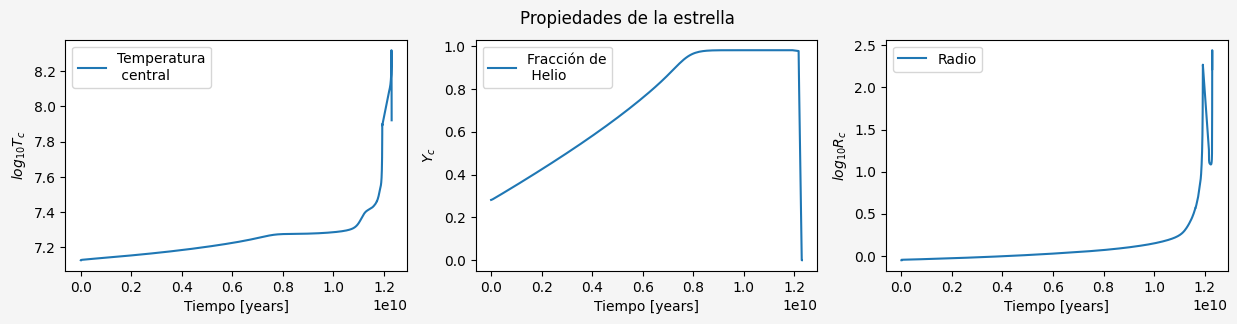

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(1,3, figsize = (15,3),facecolor="whitesmoke")
fig.suptitle("Propiedades de la estrella")

#Plots
axs[0].plot(summary[1],summary[6], label = "Temperatura\n central")
axs[1].plot(summary[1],summary[11], label = "Fracción de\n Helio")
axs[2].plot(summary[1],summary[4], label = "Radio")

#Decoración
axs[0].legend(); axs[1].legend(); axs[2].legend()
axs[0].set_ylabel(r"$log_{10}T_c$")
axs[0].set_xlabel("Tiempo [years]")
axs[1].set_ylabel(r"$Y_c$")
axs[1].set_xlabel("Tiempo [years]")
axs[2].set_ylabel(r"$log_{10}R_c$ ")
axs[2].set_xlabel("Tiempo [years]")
plt.show()

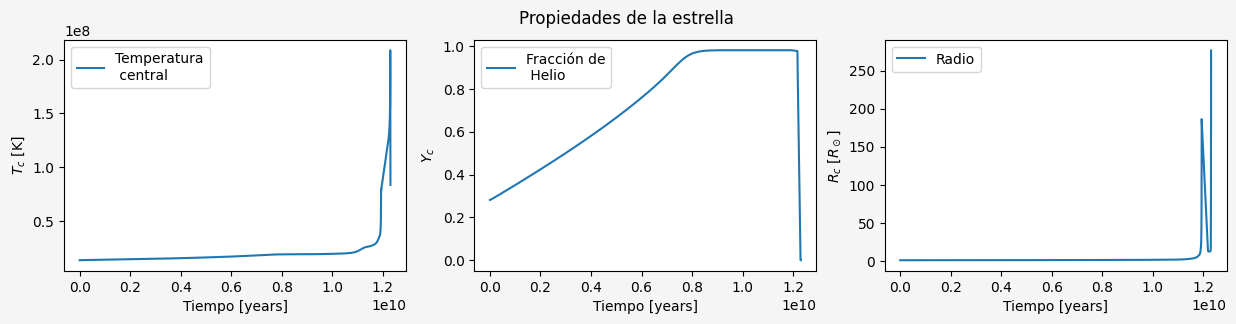

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(1,3, figsize = (15,3),facecolor="whitesmoke")
fig.suptitle("Propiedades de la estrella")

#Plots
axs[0].plot(summary[1],10**summary[6], label = "Temperatura\n central")
axs[1].plot(summary[1],summary[11], label = "Fracción de\n Helio")
axs[2].plot(summary[1],10** summary[4], label = "Radio")

#Decoración
axs[0].legend(); axs[1].legend(); axs[2].legend()
axs[0].set_ylabel(r"$T_c$ [K]")
axs[0].set_xlabel("Tiempo [years]")
axs[1].set_ylabel(r"$Y_c$")
axs[1].set_xlabel("Tiempo [years]")
axs[2].set_ylabel(r"$R_c \ [R_\odot]$ ")
axs[2].set_xlabel("Tiempo [years]")
plt.show()

# 3. Estructura en diferentes momentos de la vida del sol

In [ ]:
#Se sintetiza la información en un dataframe, pero primero
#se recopilan los datos en un diccionario.

momentos = {"etapa":["Inicio", "presente", "fin", "gigante"],
            "archivo":[],
            "tiempo":[],
            "masa":[],
            "log_radio":[],
            "log_temperatura_Tc":[],
            "fraccion_Yc":[]}

**Inicio:** hace referencia al inicio de la fase de secuencia principal, en esta la estrella comienza a fusionar hidrógeno en helio.

La menor edad que se tiene en los registros es la ubicada en el último índice.

In [ ]:
#Es el primer archivo structure (0000)
inicio = 0

print(f"El índice donde está el inicio de la secuencia principal es el {inicio}.")

El índice donde está el inicio de la secuencia principal es el 0.


**Tiempo Presente:** Actualmente el Sol sigue teniendo una considerable concentración de Hidrógeno (mayor al 50% de su composición), por ende, sigue estando en plena Secuencia principal. Éste corresponde a 4560 millones de años desde el nacimiento del sol.

In [ ]:
#para buscar qué archivo corresponde a ese tiempo, se extraen
#los valores como arreglo

tiempos = summary[1].to_numpy()

#Luego se busca dónde está el tiempo actual proponiendo un intervalo
#en el que puede estar el valor.

presente = np.where((tiempos > 4.559e9) & (tiempos < 4.561e9))[0][0]

print(f"El índice donde está actualmente el sol de la secuencia principal es el {presente}.")

El índice donde está actualmente el sol de la secuencia principal es el 65.


**Fin de la secuencia principal:** Esta etapa llega cuando se acaba la fusión de hidrógeno en el núcleo y se continúa con la fusión de helio en un intento de la estrella de mantenerse. El fin de la secuencia principal se evidencia en que la fracción de Helio $Y_c≈1$.

In [ ]:
#Basta con hallar el índice de la máxima fracción de Helio

helio = summary[11].to_numpy()

fin = np.where(helio == max(helio))[0][0]

print(f"El índice donde está el fin de la secuencia principal es el {fin}.")

El índice donde está el fin de la secuencia principal es el 135.


**Gigante Roja:** Cuando la estrella sale de la secuencia principal y comienza a fusionar helio, la estrella pierde sus capas externas, aumentando de tamaño y convirtiéndose en una gigante roja. Esto ocurre donde la temperatura es de alrededor de 75 millones de grados.

In [ ]:
#recordando que se tiene log Tc y se debe invertir la función

temperaturas = 10**summary[6].to_numpy()

#Al igual que en un caso previo, se restringe el intervalo en el que
#debe estar el valor buscado.

gigante = np.where((temperaturas > 7.47e7) & (temperaturas < 7.53e7))[0][0]

print(f"El índice donde está en la etapa de gigante roja es el {gigante}.")

El índice donde está en la etapa de gigante roja es el 454.


Ahora se extrae la información de el archivo de *summary.txt* para sintetizar los datos de las etapas en un solo *DataFrame*.

In [ ]:
etapas = [inicio, presente,fin,gigante]

In [ ]:
for etapa in etapas:

  momentos["archivo"].append(etapa)
  momentos["tiempo"].append(summary.loc[etapa, 1])
  momentos["masa"].append(summary.loc[etapa,2])
  momentos["log_radio"].append(summary.loc[etapa, 4])
  momentos["log_temperatura_Tc"].append(summary.loc[etapa, 6])
  momentos["fraccion_Yc"].append(summary.loc[etapa, 11])


In [ ]:
momentos = pd.DataFrame(momentos)
momentos

,etapa,archivo,tiempo,masa,log_radio,log_temperatura_Tc,fraccion_Yc
0,Inicio,0,0.000000e+00,1.000000,-0.052737,7.126281,0.281393
1,presente,65,4.560212e+09,0.999580,0.002414,7.194228,0.627044
2,fin,135,1.027161e+10,0.998577,0.165256,7.289780,0.979999
3,gigante,454,1.193119e+10,0.900595,2.196942,7.875998,0.979995


# 4. Comparación con el modelo exacto

La intención de este numeral, es encontrar valores de temperatura, densidad y presión para la estrella solucionando la ecuación de Lane-Emden. Para ello, se tendrá de guía la presentación de classroom *clase 9-2023-2-Medios Autogravitantes* y su respectivo notebook.

La ecuación de Lane-Emden es:

$$\frac{1}{\xi ^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right)+\theta^\frac{1}{\gamma-1}=0$$

que es equivalente a:

$$
\frac{d^2\theta}{d \xi^2}=-\frac{2}{\xi}\frac{d\theta}{d \xi}-\theta^{\frac{1}{\gamma-1}}
$$


*Ecuaciones obtenidas de Cuaderno-MCON-MediosAutogravitantes-EcuacionLaneEmden.ipynb*

In [ ]:
#Usando el código del notebook de clase

def lane_emden(x,Y,gamma=5/3):

  teta,tetap=Y

  dtetadr=tetap
  dtetapdr=-2/x*tetap-abs(teta)**(1/(gamma-1))

  return np.array([dtetadr,dtetapdr])

def surface(t,Y,gamma):
  """Esta rutina detecta cuando la solución a la ecuación
  llega a la superficie que es cuando \theta = 0.
  """
  teta,tetap=Y
  return teta


In [ ]:
def politropa(gamma, xmax=10):
  global surface

  xs=np.linspace(1e-2,xmax,1000)
  Yo=[1,0]

  #Resolvemos
  sol = solve_ivp(lane_emden,[xs[0],xs[-1]],t_eval=xs,
                  y0=Yo,args=(gamma,),events=surface)
  tetas = sol.y[0]
  tetaps = sol.y[1]

  #Buscamos superficie
  if len(sol.t_events[0])>0:
    hasurf = True
    x_surf = sol.t_events[0][0]
    teta_surf = sol.y_events[0][0,0]
    tetap_surf = sol.y_events[0][0,1]
  else:
    hasurf = False
    x_surf = xs[-1]
    teta_surf = tetas[-1]
    tetap_surf = tetaps[-1]

  #Interpolamos
  xns = np.linspace(xs[0],x_surf,100)
  tetans = np.interp(xns,xs,tetas)
  tetapns = np.interp(xns,xs,tetaps)

  return hasurf, xns, tetans, tetapns

La intención de ésto, es resolver la ecuación de Lane-Emdem, sabiendo que las variables $\xi$ y $\theta$ son valores escalados para el radio y la temperatura respectivamente.

Como se desea caracterizar la estrella, es importante conocer los valores de solución en la superficie del cuerpo. Tenga presente que las funciones tomadas dependen de $\gamma$, el índice adiabático, ello indica que la estrella se modela como un sistema que no intercambia energía con el entorno, y que por tanto los procesos termodinámicos a los que es sometido, son adiabáticos.

## Extracción índice adiabático y Calor específico del modelo real

Ahora se puede pasar a extraer la información de índice adiabático en las etapas a estudiar, para ello se usan los archivos que ya previamente se habían cargado y que se escogieron convenientemente para que correspondieran a los de las etapas. Así que se puede trabajar sobre el diccionario *estructuras* que se había creado inicialmente.

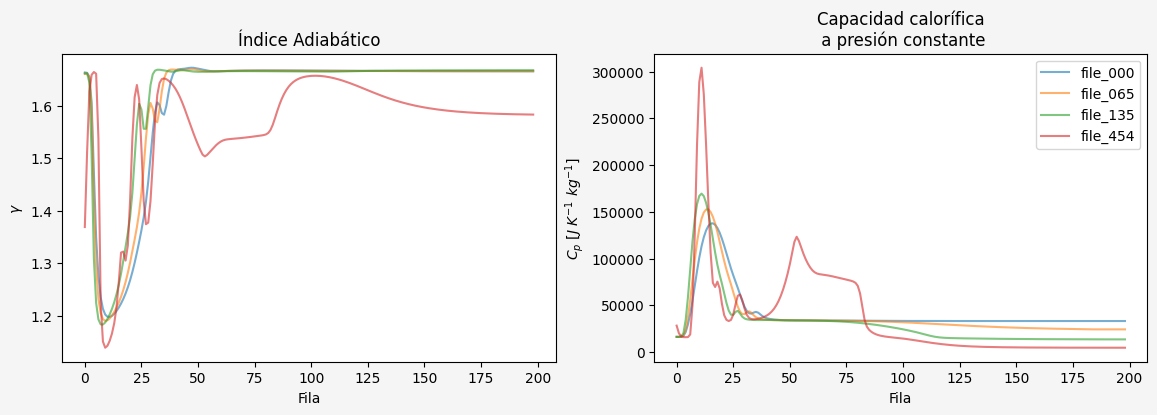

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(1,2, figsize = (14,4),facecolor = "whitesmoke")

axs[0].set_title("Índice Adiabático")
axs[1].set_title("Capacidad calorífica\n a presión constante")

#Plots
for name in estructuras.keys():
  axs[0].plot(estructuras[name][9], label = name, alpha = 0.6)
  axs[1].plot(estructuras[name][8], label = name, alpha = 0.6)


#Decoración
axs[0].set_ylabel(r"$\gamma$")
axs[0].set_xlabel("Fila")
axs[1].set_ylabel(r"$C_p \ [J \ K^{-1} \ kg^{-1}]$")
axs[1].set_xlabel("Fila")

plt.legend()
plt.show()

En primer lugar, se resalta que no hay un índice adiabático constante en los archivos, sino que va cambiando en cada línea de información, ésto afecta la solución de la ecuación puesto que se debe resolver para cada $\gamma$.

Adicionalmente, también se puede notar que en los primeros tres archivos, correspondientes a la Secuencia principal, el índice adiabático es aproximadamente constante, del orden de $\gamma=1.67$, y que las máximas fluctuaciones están entre las filas 0 y 50.

Sin embargo, como hay demasiados valores de $\gamma$ y muy similares entre sí, por lo que se toman solo N datos para cada archivo, entre las filas en las que se tienen más cambios, para ver cómo varía la solución.

### Fluctuaciones en la solución de la ecuación de Lane-Emden para diferentes índices adiabáticos en el modelo real.

*Sabiendo que los archivos iniciales tienen fluctuaciones notables en el $gamma$ para las filas de 0 a 50, entonces se escogen 8 datos igualmente espaciados en esta franja. En cambio, para la etapa de gigante roja, se pueden escoger los datos de $\gamma$ entre todas las filas (de la 0 a 198)*

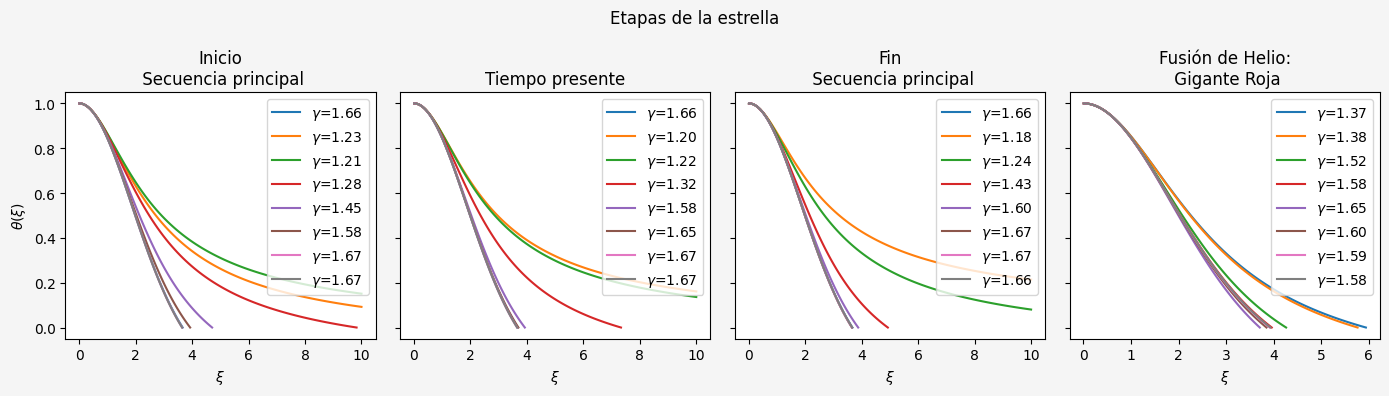

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(1,4, figsize = (14,4),
                        facecolor = "whitesmoke",sharey = True)

fig.suptitle("Etapas de la estrella")

#__________________________________________________________________
#Graficos de Secuencia Principal
for id_graf,name in enumerate(list(estructuras.keys())[:3]):

  #indices a graficar
  dato = np.linspace(0,50,8)
  dato = [int(i) for i in dato] #como son índices, debe ser enteros

  #gammas según el índice
  gamas_todos = estructuras[name][9].to_numpy()
  gamas_escogidos = gamas_todos[dato]

  #en cada grafica se hace la solución según la etapa
  for gamma in gamas_escogidos:
    hasurf, xns, tetans, tetapns = politropa(gamma)
    axs[id_graf].plot(xns,tetans,label=rf"$\gamma$={gamma:.2f}")

  #Decoración
  axs[id_graf].legend()
  axs[id_graf].set_xlabel(r"$\xi$")

#__________________________________________________________________
#Grafico Gigante roja
#indices a graficar
dato = np.linspace(0,198,8)
dato = [int(i) for i in dato] #como son índices, debe ser enteros

gamas_todos = estructuras["file_454"][9].to_numpy()
gamas_escogidos = gamas_todos[dato]

for gamma in gamas_escogidos:
  hasurf, xns, tetans, tetapns = politropa(gamma)
  axs[3].plot(xns,tetans,label=rf"$\gamma$={gamma:.2f}")

#Decoración
axs[3].legend()
axs[3].set_xlabel(r"$\xi$")

#_________________________________________________________________
axs[0].set_title("Inicio\n Secuencia principal")
axs[1].set_title("Tiempo presente")
axs[2].set_title("Fin\n Secuencia principal")
axs[3].set_title("Fusión de Helio:\n Gigante Roja")
axs[0].set_ylabel(r"$\theta(\xi)$")

plt.tight_layout()
plt.show()

## Temperatura y densidad central de la solución de la ecuación Lane-Emden

Para calcular la temperatura central cerca de la superficie, se pueden usar las siguientes expresion:

\begin{align}
g_0 &=\frac{GM_*}{R_*^2}\\
T_0 &=\frac{g_0R_*}{c_p}
\end{align}

*Ecuaciones tomadas de MCON-clase 9-2023-2-Medios Autogravitantes en el slice 54*

La masa y radio de la estrella ya están compilados para cada etapa en el DataFrame *momentos*, donde en dicha tabla, la masa está dada en $M_\odot$ y el radio, en realidad está como $log_{10}R$, y donde al despejar el radio,está en términos de $R_\odot$.

In [ ]:
#En unidades internacionales
masa_solar_kg = 1.989e30  # kg
radio_solar_m = 6.957e8   #m
G = 6.67e-11 # m^3/(kg s^2)

#extrayendo los valores de la tabla
masa = momentos['masa'].to_numpy() * masa_solar_kg
radio = 10**momentos['log_radio'].to_numpy() * radio_solar_m

#gravedad g0
g0 = G * masa / radio**2

Como $c_p$ tampoco es una constante, el valor de $T_0$ varía en cada paso (filas) en los archivos. Por lo tanto, la temperatura del centro, pues está dada como:

$$T_c=-\frac{T_0}{\theta\prime(\xi_0)\xi_0}$$

donde $\xi_0$ y $\theta$ se obtienen de la solución de la ecuación Lane-Emden.

El valor de la densidad central también se puede deducir de los límites de la polítropa.

$$\rho_c=\frac{c_p T_c}{4\pi G \lambda^2}$$

donde $\lambda = R_*/\xi_0$.

*Ecuaciones tomadas de MCON-clase 9-2023-2-Medios Autogravitantes en el slice 60*

Para contrastar el cambio que tiene la temperatura central según los diferentes índices adiabáticos que se presentan, se recurre a seleccionar los $\gamma$ menor y mayor que se tienen para cada etapa.

Se cabe resaltar que se calculan los límites de la polítropa obteniendo el último término del conjunto de $\xi$ y $\theta\prime$.

In [ ]:
#Los valores de temperatura y densidad serán guardados en
#los siguientes arreglos vacíos, para 2 gamma: maximo y mínimo.

Tc = np.zeros((4,2,199)) #etapas, gamas, pasos
rhoc = np.zeros((4,2,199)) #etapas, gamas, pasos

#guardar el gamma y lambda usado
gamma_escogidos = np.zeros((4,2)) #etapas, gamas


In [ ]:
#Calculando los valores de Tc y ρc

for id_graf,name in enumerate(estructuras.keys()):

  #extracción datos para la etapa
  cps = estructuras[name][8].to_numpy()    #calor específico
  gamas_todos = estructuras[name][9].to_numpy()  #indice adiab
  T0 = g0[id_graf] * radio[id_graf] /cps   #Temperatura limite de pol


  #elección de los gamas
  id_dato = [np.where(gamas_todos == max(gamas_todos))[0][0],
             np.where(gamas_todos == min(gamas_todos))[0][0]]
  gamma_escogidos[id_graf] = gamas_todos[id_dato]

  #obtención de límites de la polítropa
  for id_gamma,gamma in enumerate(gamma_escogidos[id_graf]):

    #solución
    hasurf, xns, tetans, tetapns = politropa(gamma)

    #limites
    x0 = xns[-1]
    tetap0 = tetapns[-1]

    #Temperatura central
    Tc[id_graf,id_gamma] = -T0/(x0*tetap0)

    #Densidad central
    lamda = radio[id_graf] / x0
    rhoc[id_graf,id_gamma] = cps*Tc[id_graf,id_gamma]/(4*np.pi*G*lamda**2)


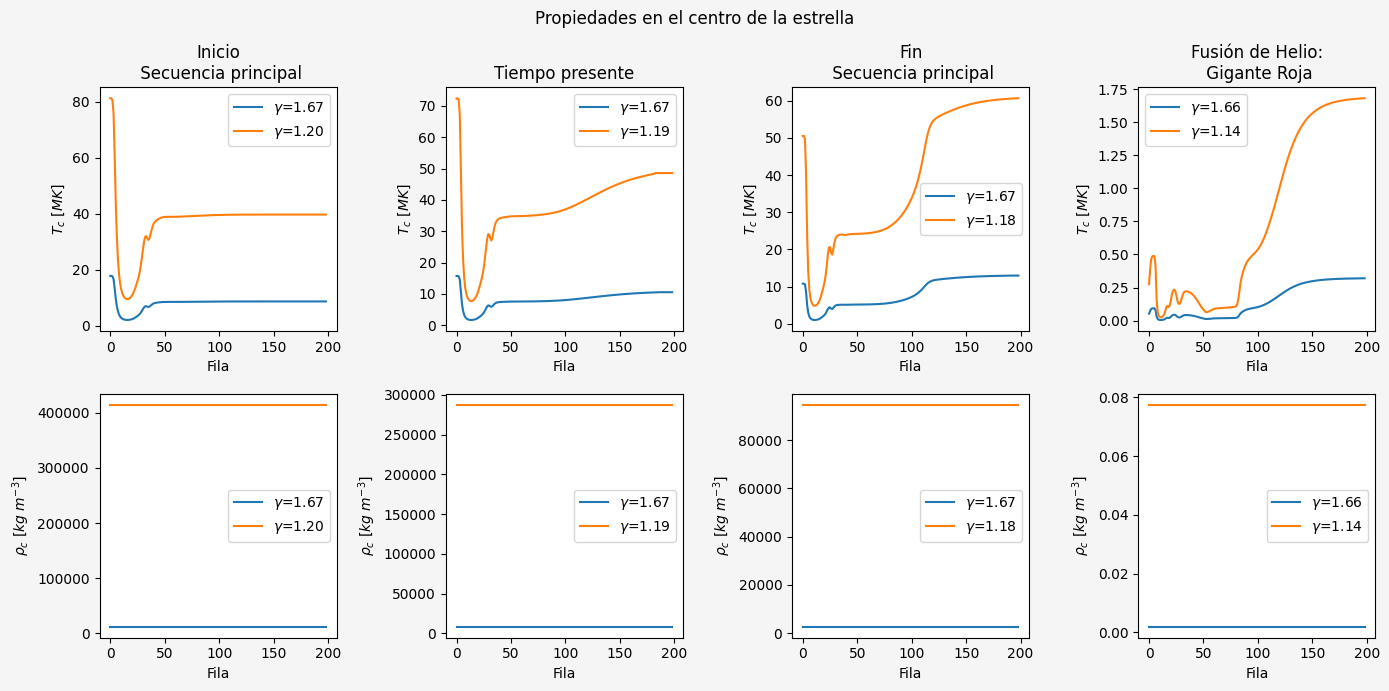

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(2,4, figsize = (14,7),facecolor = "whitesmoke")

fig.suptitle("Propiedades en el centro de la estrella")

#__________________________________________________________________
#Grafica Temperatura
for id_graf,name in enumerate(estructuras.keys()):

  for id_gamma,gamma in enumerate(gamma_escogidos[id_graf]):
    axs[0,id_graf].plot(Tc[id_graf,id_gamma]/1e6,label=rf"$\gamma$={gamma:.2f}")

  axs[0,id_graf].legend()
  axs[0,id_graf].set_xlabel("Fila")
  axs[0,id_graf].set_ylabel(r"$T_c \ [MK]$")

#Grafica Densidad
for id_graf,name in enumerate(estructuras.keys()):

  for id_gamma,gamma in enumerate(gamma_escogidos[id_graf]):
    axs[1,id_graf].plot(rhoc[id_graf,id_gamma],label=rf"$\gamma$={gamma:.2f}")

  axs[1,id_graf].legend()
  axs[1,id_graf].set_xlabel("Fila")
  axs[1,id_graf].set_ylabel(r"$\rho_c \ [kg \  m^{-3}]$")

#_________________________________________________________________
axs[0,0].set_title("Inicio\n Secuencia principal")
axs[0,1].set_title("Tiempo presente")
axs[0,2].set_title("Fin\n Secuencia principal")
axs[0,3].set_title("Fusión de Helio:\n Gigante Roja")

#_________________________________________________________________
plt.tight_layout()
plt.show()

Una forma alternativa de pensar el problema de los múltiples valores de índice adiabático y de calor específico, es notar que el comportamiento es muy cambiante en las primeras filas, sin embargo, luego convergen a un valor. Al tomar el valor de "convergencia" dado en la última fila de los *structure* se encuentra que la información obtenida no se ajusta al modelo realista, por lo tanto, se opta por tomar arbitrariamente el $\gamma_i$ y $c_{p,i}$ que más se pueda ajustar al modelo realista.

Note que como se va a simplificar el caso, entonces nuevamente se deben hallar las soluciones para la ecuación.

In [ ]:
#Los valores de temperatura y densidad serán guardados en
#los siguientes arreglos vacíos

Tc = np.zeros(4) #etapas, pasos
rhoc = np.zeros(4) #etapas, pasos

#guardar el gamma y lambda usado
gamma_escogido = np.zeros(4) #etapas
cp_escogido = np.zeros(4)
lambdas = np.zeros(4)

#guardar otros datos importantes
xns_total = np.zeros((4,100)) #etapas,dimension de la interp
tetans_total = np.zeros((4,100))
tetapns_total = np.zeros((4,100))

In [ ]:
#Calculando los valores de Tc y ρc

for id_graf,name in enumerate(estructuras.keys()):

  #extracción datos para la etapa
  cps = estructuras[name][8].to_numpy()    #calor específico
  gamas_todos = estructuras[name][9].to_numpy()  #indice adiab

  #elección de gamma y cp
  #se escoge un intervalo arbitrario
  indice = np.where((gamas_todos>1.3)&(gamas_todos<1.33))[0][0]
  gamma_escogido[id_graf] = gamas_todos[indice]
  cp_escogido[id_graf] = cps[indice]

  #Temperatura limite
  T0 = g0[id_graf] * radio[id_graf] / cp_escogido[id_graf]

  #Solución
  hasurf, xns, tetans, tetapns = politropa(gamma_escogido[id_graf])

  #limites
  x0 = xns[-1]
  tetap0 = tetapns[-1]

  #Temperatura central
  Tc[id_graf] = -T0/(x0*tetap0)

  #Densidad central
  lamda = radio[id_graf] / x0
  rhoc[id_graf] = cp_escogido[id_graf]*Tc[id_graf]/(4*np.pi*G*lamda**2)

  #guardar las soluciones
  lambdas[id_graf] = lamda
  xns_total[id_graf] = xns
  tetans_total[id_graf] = tetans
  tetapns_total[id_graf] = tetapns

In [ ]:
print(f"""
________________________________________________________________
Los valores de temperatura y densidad en el centro para
los diferentes momentos en la vida del sol son:

Inicio Secuencia P con γ={gamma_escogido[0]:.2f}  y cp={cp_escogido[0]:.2e}[J/K/kg]:

  Tc = {Tc[0]:.2e} K
  ρc = {rhoc[0]:.0f} kg/m³

Tiempo presente con γ={gamma_escogido[1]:.2f}  y cp={cp_escogido[1]:.2e}[J/K/kg]:

  Tc = {Tc[1]:.2e} K
  ρc = {rhoc[1]:.0f} kg/m³

Fin Secuencia P con γ={gamma_escogido[2]:.2f}  y cp={cp_escogido[2]:.2e}[J/K/kg]:

  Tc = {Tc[2]:.2e} K
  ρc = {rhoc[2]:.0f} kg/m³

Gigante Roja con γ={gamma_escogido[3]:.2f}  y cp={cp_escogido[3]:.2e}[J/K/kg]:

  Tc = {Tc[3]:.2e} K
  ρc = {rhoc[3]:.2e} kg/m³
________________________________________________________________""")


________________________________________________________________
Los valores de temperatura y densidad en el centro para 
los diferentes momentos en la vida del sol son:

Inicio Secuencia P con γ=1.30  y cp=1.06e+05[J/K/kg]:     

  Tc = 8.96e+06 K
  ρc = 213091 kg/m³ 

Tiempo presente con γ=1.30  y cp=1.08e+05[J/K/kg]:     

  Tc = 7.69e+06 K
  ρc = 143661 kg/m³ 

Fin Secuencia P con γ=1.31  y cp=3.46e+04[J/K/kg]:     

  Tc = 1.55e+07 K
  ρc = 39563 kg/m³ 

Gigante Roja con γ=1.32  y cp=7.41e+04[J/K/kg]:     

  Tc = 5.53e+04 K
  ρc = 2.26e-02 kg/m³ 
________________________________________________________________


Se puede observar que la temperatura en el núcleo de la estrella es consistente con lo que se esperaría por la evolución estelar, donde una estrella en secuencia principal es más compacta y por la eficiencia de la fusión de hidrógeno, se mantiene la temperatura más elevada. Posteriormente, cuando sale de la secuencia principal y comienza a "morir", su temperatura decrece, sus capas se van externas se van escapando y su densidad disminuye.

## Propiedades en el interior de la estrella

Véase que hasta el momento se ha caracterizado la estrella en términos de los parámetros de la ecuación de Lane-Emden, sin embargo, éstos no proporcionan información explícita de cómo es el medio autogravitante. Para estudiar el comportamiento de las variables temperatura, densidad, presión, se usan las siguientes relaciones:

\begin{align}
r &= \xi \lambda\\
T(r) &= \theta T_c\\
\end{align}

*Ecuaciones tomadas de MCON-clase 9-2023-2-Medios Autogravitantes en el slice 57*

Y las expresiones para deducir las densidades y presiones en la estrella se toman sel modelo homentrópico y son las siguientes:


\begin{align}
T \rho^{1-\gamma}&=T_c \rho_c^{1-\gamma}\\
T^\gamma p^{1-\gamma}&=T_c^\gamma p_c^{1-\gamma}
\end{align}

*Ecuaciones tomadas de Cuaderno-MCON-MediosAutogravitantes-EcuacionLaneEmden.ipynb*

Para construir los perfiles de temperatura, densidad y presión, basta con usar la solución de la ecuación guardada previamente.

In [ ]:
R = 8.31446261815324 #J/kg/mol

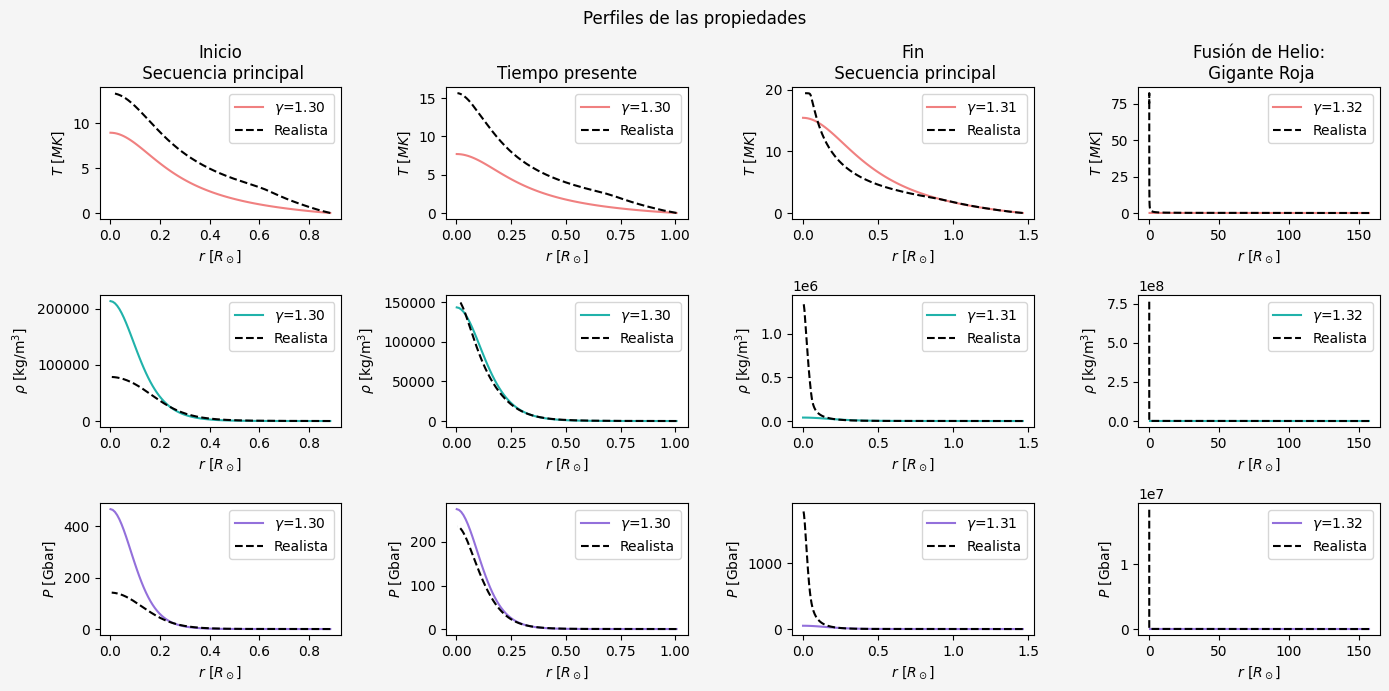

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(3,4, figsize = (14,7),facecolor = "whitesmoke")

fig.suptitle("Perfiles de las propiedades")

#__________________________________________________________________
#Perfiles calculados
for id_graf,name in enumerate(estructuras.keys()):

  Tcentro = Tc[id_graf]
  rho_centro = rhoc[id_graf]
  cp = cp_escogido[id_graf]
  gam = gamma_escogido[id_graf]

  r = xns_total[id_graf] * lambdas[id_graf]

  #Grafica Temperatura
  T = tetans_total[id_graf] * Tcentro

  axs[0,id_graf].plot(r/radio_solar_m,T/1e6, color = "lightcoral",
                      label=rf"$\gamma$={gam:.2f}")
  axs[0,id_graf].set_xlabel(r"$r$ [$R_\odot$]")
  axs[0,id_graf].set_ylabel(r"$T \ [MK]$")

  #Grafica Densidad
  rhos = (Tcentro*rho_centro**(1-gam)/T)**(1/(1-gam))

  axs[1,id_graf].plot(r/radio_solar_m,rhos, color = "lightseagreen",
                      label=rf"$\gamma$={gam:.2f}")
  axs[1,id_graf].set_xlabel(r"$r$ [$R_\odot$]")
  axs[1,id_graf].set_ylabel(r"$\rho$ [kg/m$^3$]")

  #Grafica Presion
  Mmol = gam /(gam-1) * R / cp
  pc = R*Tcentro*rho_centro/Mmol
  ps = (Tcentro**gam*pc**(1-gam)/T**gam)**(1/(1-gam))

  axs[2,id_graf].plot(r/radio_solar_m,ps/1e5/1e9, color = "mediumpurple",
                      label=rf"$\gamma$={gam:.2f}")
  axs[2,id_graf].set_xlabel(r"$r$ [$R_\odot$]")
  axs[2,id_graf].set_ylabel(r"$P$ [Gbar]")

#__________________________________________________________________
#Perfil realista
for id_graf,name in enumerate(estructuras.keys()):
  r = estructuras[name][1].to_numpy()
  T = estructuras[name][5].to_numpy()
  rho = estructuras[name][4].to_numpy()
  p = estructuras[name][3].to_numpy()

  axs[0,id_graf].plot(r,T/1e6, "k--", label = "Realista")
  axs[1,id_graf].plot(r,rho, "k--", label = "Realista")
  axs[2,id_graf].plot(r,p/1e5/1e9, "k--", label = "Realista")

  axs[0,id_graf].legend()
  axs[1,id_graf].legend()
  axs[2,id_graf].legend()



#_________________________________________________________________
axs[0,0].set_title("Inicio\n Secuencia principal")
axs[0,1].set_title("Tiempo presente")
axs[0,2].set_title("Fin\n Secuencia principal")
axs[0,3].set_title("Fusión de Helio:\n Gigante Roja")

#_________________________________________________________________
plt.tight_layout()
plt.show()

Se pudo evidenciar que aplicando el modelo para un medio autogravitante no ajusta muy bien con el realista, en parte por la escogencia del índice adiabático, puesto que cada etapa ajusta mejor a un $\gamma$ distinto, o inclusive, si se logra una similaridad en una de las gráficas, el modelo falla en las otras.

# 5. Mejorando el modelo

Manualmente se intenta cambiar el $\gamma$ y se encuentra que no hay un valor que ajuste bien a las cuatro etapas, inclusive, en el tiempo de Gigante Roja, al ser tan abrupto el cambio de condiciones del núcleo con respecto a las capas externas, hace que sea dificil modelarlo con precisión.

Se va a intentar mejorar el ajuste con la etapa del tiempo presente del sol que es la que ya se asemeja más al modelo realista.

Inicialmente, se prueba visualizando cómo cambian las gráficas según el $\gamma$.

In [ ]:
#Para el tiempo presente del sol
name = 'file_065'

#extracción datos para la etapa
cps = estructuras[name][8].to_numpy()    #calor específico
gamas_orig = estructuras[name][9].to_numpy() #indice adiab

#gravedad g0
g0 = G * masa[1] / radio[1]**2

In [ ]:
#probemos varios gamas distintos

gamas_prueba = np.linspace(1.295,1.298,4)
#gamas_prueba = np.linspace(min(gamas_orig),max(gamas_orig),4)

In [ ]:
#Para conocer los cp correspondientes, se hace interpolación
#pero cps debe de ser creciente
indices_orden = np.argsort(gamas_orig)
cps = cps[indices_orden]
gamas_orig = gamas_orig[indices_orden]

#interpolacion
cp_interp = CubicSpline(gamas_orig, cps)

#los cp correspondiente a los gamma de prueba
cp_prueba = cp_interp(gamas_prueba)

In [ ]:
#Para guardar las soluciones y propiedades
Tc = np.zeros(len(gamas_prueba))
rhoc = np.zeros(len(gamas_prueba))

r_graf = np.zeros((len(gamas_prueba),100))
T_graf = np.zeros((len(gamas_prueba),100))
rho_graf = np.zeros((len(gamas_prueba),100))
p_graf = np.zeros((len(gamas_prueba),100))

In [ ]:
for id_gamma,gamma in enumerate(gamas_prueba):
  #Temperatura en los límites de la polítropa
  T0 = g0 * radio[1] / cp_prueba[id_gamma]

  #solución
  hasurf, xns, tetans, tetapns = politropa(gamma)

  #limites
  x0 = xns[-1]
  tetap0 = tetapns[-1]

  #Temperatura central
  Tc[id_gamma] = -T0 / ( x0 * tetap0 )

  #Densidad central
  lamda = radio[1] / x0
  rhoc[id_gamma] = cp_prueba[id_gamma] * Tc[id_gamma] / (4*np.pi*G*lamda**2)

  #radios
  r = xns * lamda

  #Temperatura T(r)
  T = tetans * Tc[id_gamma]

  #Densidad rho(r)
  rhos = (Tc[id_gamma]*rhoc[id_gamma]**(1-gamma)/T)**(1/(1-gamma))

  #Presión p(r)
  Mmol = gamma / (gamma - 1) * R / cp_prueba[id_gamma]
  pc = R * Tc[id_gamma] * rhoc[id_gamma] / Mmol
  ps = (Tc[id_gamma]**gamma * pc**(1-gamma) / T**gamma)**(1/(1-gamma))

  #Guardando los datos
  r_graf[id_gamma] = r
  T_graf[id_gamma] = T
  rho_graf[id_gamma] = rhos
  p_graf[id_gamma] = ps

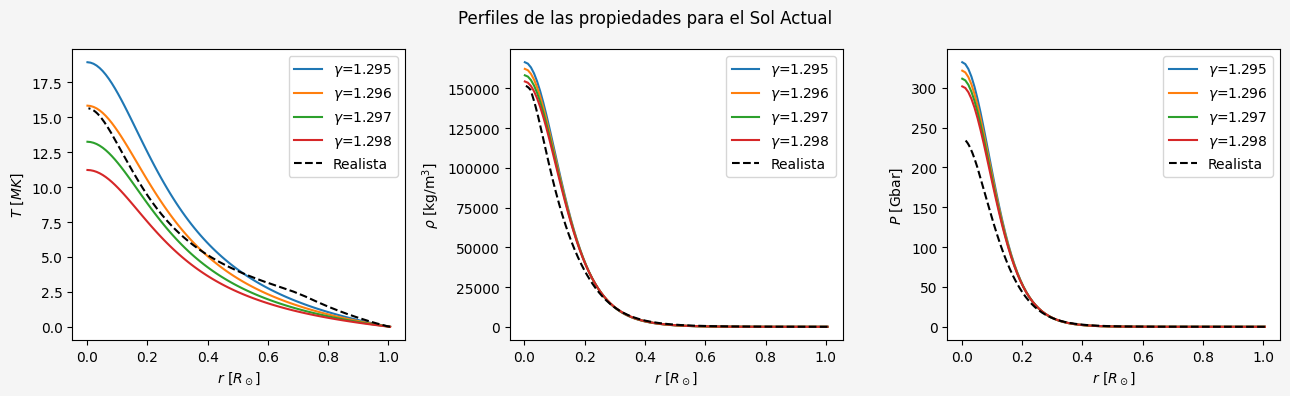

In [ ]:
#Inicialización gráfica
fig, axs = plt.subplots(1,3, figsize = (13,4),facecolor = "whitesmoke")

fig.suptitle("Perfiles de las propiedades para el Sol Actual")

#__________________________________________________________________
#Perfiles calculados
for id_gamma,gamma in enumerate(gamas_prueba):

  #Temperatura
  axs[0].plot(r_graf[id_gamma]/radio_solar_m , T_graf[id_gamma]/1e6,
              label=rf"$\gamma$={gamma:.3f}")

  axs[0].set_xlabel(r"$r$ [$R_\odot$]")
  axs[0].set_ylabel(r"$T \ [MK]$")

  #Densidad
  axs[1].plot(r_graf[id_gamma]/radio_solar_m , rho_graf[id_gamma],
              label=rf"$\gamma$={gamma:.3f}")
  axs[1].set_xlabel(r"$r$ [$R_\odot$]")
  axs[1].set_ylabel(r"$\rho$ [kg/m$^3$]")

  #Presion
  axs[2].plot(r_graf[id_gamma]/radio_solar_m , p_graf[id_gamma]/1e5/1e9,
              label=rf"$\gamma$={gamma:.3f}")
  axs[2].set_xlabel(r"$r$ [$R_\odot$]")
  axs[2].set_ylabel(r"$P$ [Gbar]")

#__________________________________________________________________
#Perfil realista

r = estructuras[name][1].to_numpy()
T = estructuras[name][5].to_numpy()
rho = estructuras[name][4].to_numpy()
p = estructuras[name][3].to_numpy()

axs[0].plot(r,T/1e6, "k--", label = "Realista")
axs[1].plot(r,rho, "k--", label = "Realista")
axs[2].plot(r,p/1e5/1e9, "k--", label = "Realista")

axs[0].legend()
axs[1].legend()
axs[2].legend()

#_________________________________________________________________
plt.tight_layout()
plt.show()

Como ya se había comentado, ajustar una de las gráficas sólo con el $\gamma$ es imposible, al menos con el modelo que se está trabajando. Por ejemplo, manualmente se encontró que $\gamma=1.296$ coincide aproximadamente con los valores de inicio y fin de la temperatura según el radio, pero en cuanto a la forma, no se tiene un ajuste muy preciso, pero éste mismo valor del índice adiabático no es la que mejor funciona en el caso de la densidad o de la presión. Para lograr mejorar el modelo sería necesario multiplicar las funciones de $\rho$ y $p$ para "achatarlas". Sin embargo, no se tiene un mecanismo eficiente de ajustar el perfil de temperatura analíticamente (sin usar una interpolación).